In [4]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors as knn

1. Importar dataset de winequality-red.csv.

In [6]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# PCA ES UN MODELO INTERMEDIO

# SI VOY A HACER UNA PREDICCIÓN -> SEPARO ENTRE X e Y SIEMPRE

# SI VOY A HACER UNA CLUSTERIZACIÓN
#   -> Normalmente no separo entre X e Y porque quiero buscar similitudes entre usuarios
#   -> Si se que es muy importante la columna quality por cuestiones de negocio -> separo

In [11]:
# Separar variables predictoras (X) y la variable objetivo (y)
X = data.drop(columns=['quality'])  # Eliminamos la variable objetivo
y = data['quality']  # Guardamos la variable objetivo para análisis posterior

In [13]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### PCA

2. Estandarizar los datos

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [19]:
#media = data.mean()
#desvio = data.std()
#X_estandar = (data-media)/desvio

3. Aplicar PCA con todas las componentes principales y obtener las columnas transformadas

In [22]:
# Aplicar PCA
pca = PCA(n_components=11)
X_pca = pca.fit_transform(data_scaled)

In [24]:
X_pca

array([[-1.61952988,  0.45095009, -1.77445415, ..., -0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ...,  0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ...,  0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ...,  0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ...,  0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ..., -0.40430898,
         0.77943963, -0.44978056]])

In [26]:
# son los desvíos asociados a cada componente principal
pca.singular_values_

array([70.39540306, 55.49350947, 49.79276091, 44.04496358, 39.16513784,
       32.47635471, 30.55294028, 26.00591784, 23.47515165, 17.02796915,
        9.75877763])

In [28]:
# lambda explica la varianza, por lo que lambda se calcula como este valor al cuadrado
lam = pca.singular_values_ ** 2
print(lam[0] / sum(lam))
print(lam[1] / sum(lam))

0.28173931278817277
0.17508269905476756


4. Transformar columnas transformadas a DataFrame y calcular matriz de correlación de la misma (es el output de pca.fit_transform). Redondear a 2 decimales

In [31]:
X_pca_tabla = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC8", "PC10", "PC11"])
X_pca_tabla.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC8,PC10,PC11
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,0.913921,0.161043,0.282258,-0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,-0.929714,1.009829,-0.762587,0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,-0.401473,0.539553,-0.597946,0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,0.131017,-0.344290,0.455375,-0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,0.913921,0.161043,0.282258,-0.005098,-0.267759,0.048630


In [36]:
X_pca_tabla = pd.DataFrame(
    X_pca, 
    columns = [f"PC{i}" for i in range(1,13)]
)

ValueError: Shape of passed values is (1599, 11), indices imply (1599, 12)

In [38]:
# verifico que tienen correlación 0 las componentes principales
pd.DataFrame(X_pca).corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
1,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
2,-0.0,-0.0,1.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
3,-0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
4,0.0,0.0,0.0,-0.0,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0
5,0.0,-0.0,0.0,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,0.0
6,-0.0,0.0,-0.0,0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.0
7,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0
9,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,1.0,-0.0


5. Mostrar cuanta variabilidad explica cada una de las variables y seleccionar la cantidad de componentes principales necesarias para explicar por lo menos el 75% de la variablidad 

In [41]:
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza total explicada con 3 componentes: {sum(explained_variance) * 100:.2f}%")

Varianza explicada por cada componente: [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]
Varianza total explicada con 3 componentes: 100.00%


In [43]:
# este es el ratio de cuanto se explica de la varianza con cada una de las componentes.
pca.explained_variance_ratio_.cumsum()

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

In [45]:
# Vemos que las primeras 5 ya explican un 79%

6. Crear una variable data_clean que contenga una tabla con todas las componentes principales seleccionadas

In [49]:
# Aplicar PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(data_scaled)

data_clean = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
data_clean.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.619530,0.450950,-1.774454,0.043740,0.067014
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149
4,-1.619530,0.450950,-1.774454,0.043740,0.067014


### Extra: Clusterizar los datos

7. Realizar K-Means para clusterizar los datos. Usar 5 clusters

In [53]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10, max_iter=300)
kmeans.fit(data_clean)
clusters = kmeans.fit_predict(data_clean)
#cluster = modelo.labels_

In [55]:
kmeans.labels_

array([3, 3, 3, ..., 0, 3, 0])

In [57]:
data['Cluster'] = clusters
data.groupby('Cluster').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Cluster,,,,,,,,,,,,
0,7.100955,0.446847,0.242357,2.157325,0.068054,17.520701,39.821656,0.994437,3.409172,0.679395,11.741773,6.146497
1,10.632337,0.405666,0.489592,2.724592,0.086859,9.926630,28.497283,0.998193,3.181060,0.714429,10.614855,5.951087
2,8.236550,0.536213,0.293099,3.208918,0.088269,27.698830,90.245614,0.997471,3.287251,0.635088,9.836647,5.350877
3,7.506227,0.651291,0.114396,2.243132,0.084531,11.570513,34.152015,0.996628,3.371154,0.588956,9.952442,5.324176
4,8.462069,0.531034,0.493793,1.975862,0.351172,15.137931,62.068966,0.997097,3.050690,1.288621,9.482759,5.344828


8. Con el método del codo analizar la cantidad óptima de clusters a seleccionar

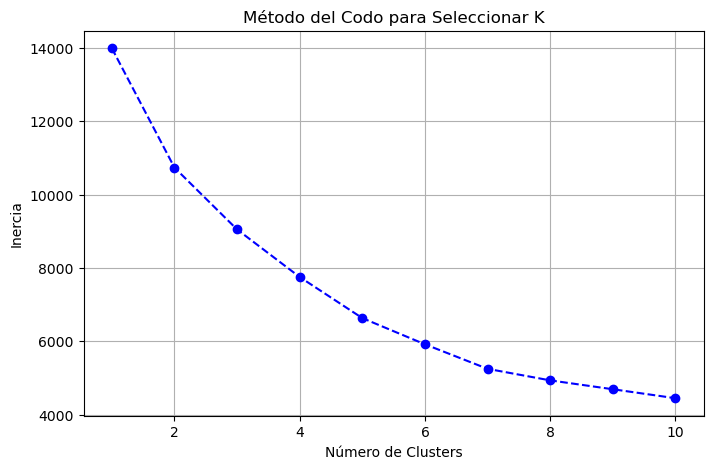

In [65]:
# 🔹 4. Método del codo para elegir el número óptimo de clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(data_clean)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Seleccionar K')
plt.grid()
plt.savefig("1.png") 
plt.show()


In [62]:
inertia

[13988.22824333326,
 10734.164940560991,
 9047.84569716121,
 7751.292566772682,
 6631.62666357257,
 5917.102486383959,
 5248.622707311983,
 4934.198656448434,
 4692.55018229644,
 4447.868157817484]